In [16]:
import numpy as np
import pandas as pd

# Import the datasets
amazon_term_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-Term_reduced.csv')
amazon_2gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-Bigram_reduced.csv')
amazon_3gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-Trigram_reduced.csv')
amazon_4gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-4-gram_reduced.csv')

In [17]:
# Term training data and labels
X_train_term = amazon_term_training.iloc[:, :-1].values
y_train_term = amazon_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_2gram = amazon_2gram_training.iloc[:, :-1].values
y_train_2gram = amazon_2gram_training.iloc[:, -1].values

# 3gram training data and labels
X_train_3gram = amazon_3gram_training.iloc[:, :-1].values
y_train_3gram = amazon_3gram_training.iloc[:, -1].values

# 4gram training data and labels
X_train_4gram = amazon_4gram_training.iloc[:, :-1].values
y_train_4gram = amazon_4gram_training.iloc[:, -1].values

Term - Average accuracy: 0.554 (+- 0.021)
Bigram - Average accuracy: 0.560 (+- 0.027)
Trigram - Average accuracy: 0.541 (+- 0.013)
4-gram - Average accuracy: 0.535 (+- 0.016)


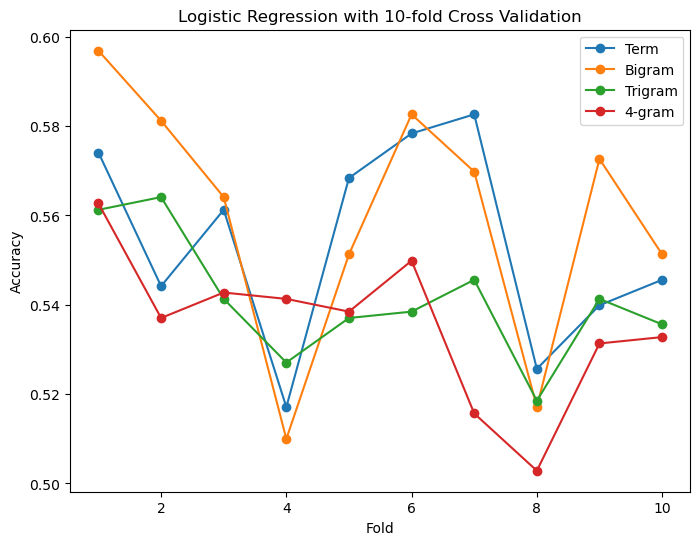

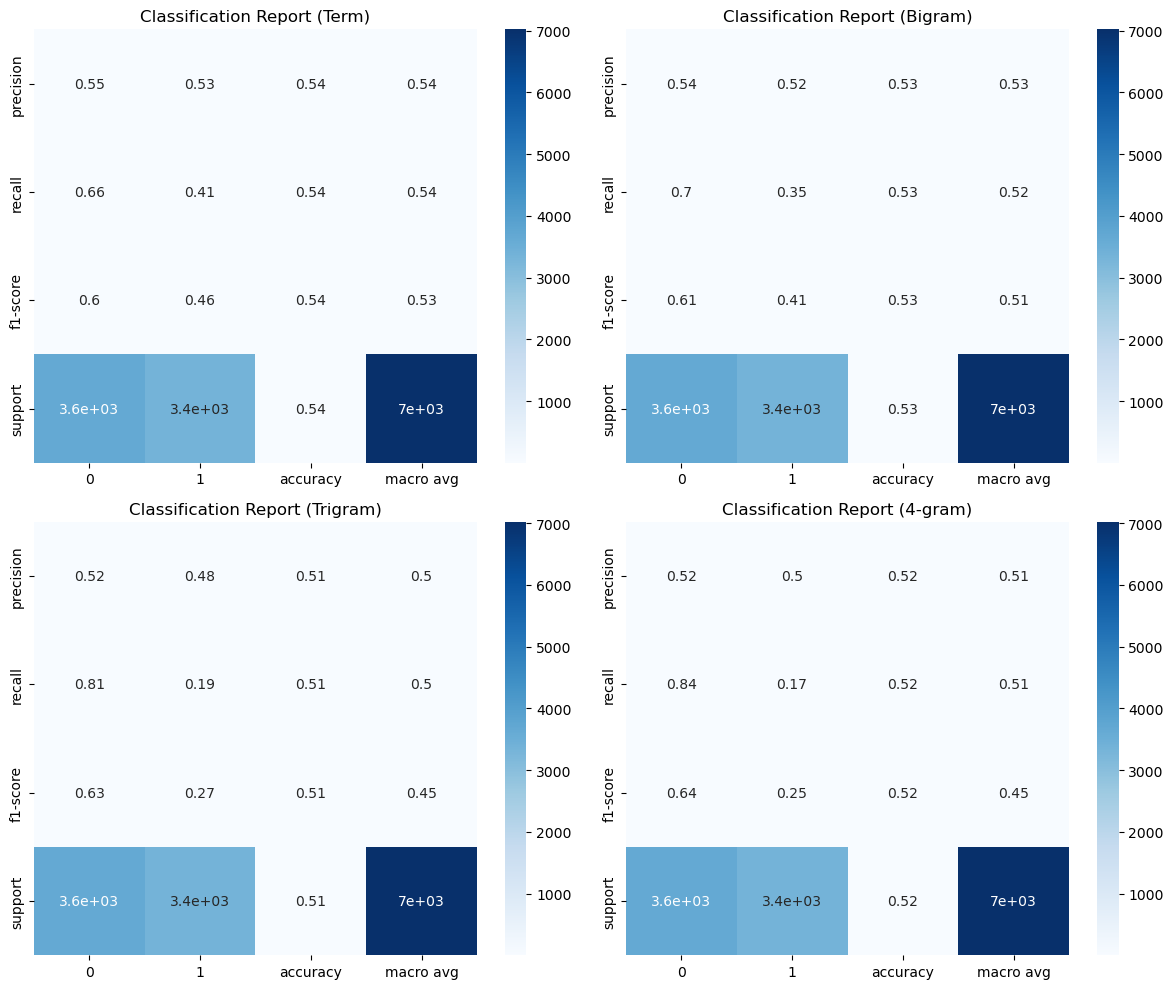

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

def evaluate_model(n_gram, X_train, y_train, ax):
    model = LogisticRegression(solver='saga', max_iter=3000)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
    print(f'{n_gram} - Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
    
    ax.plot(range(1, k+1), scores, '-o', label=n_gram)
    
    y_pred = cross_val_predict(model, X_train, y_train, cv=k)
    report = classification_report(y_train, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    return report_df

k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
fig, ax = plt.subplots(figsize=(8, 6))

n_grams = ['Term', 'Bigram', 'Trigram', '4-gram']
X_train_list = [X_train_term, X_train_2gram, X_train_3gram, X_train_4gram]
y_train_list = [y_train_term, y_train_2gram, y_train_3gram, y_train_4gram]

reports = []
for n_gram, X_train, y_train in zip(n_grams, X_train_list, y_train_list):
    report_df = evaluate_model(n_gram, X_train, y_train, ax)
    reports.append(report_df)

ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title(f'Logistic Regression with {k}-fold Cross Validation')
ax.legend()
plt.show()

# Visualize classification reports
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (n_gram, report_df) in enumerate(zip(n_grams, reports)):
    ax = axes[i]
    sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', ax=ax)
    ax.set_title(f'Classification Report ({n_gram})')

plt.tight_layout()
plt.show()
